In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons


In [5]:
moons = make_moons(n_samples=200, noise=0.2, random_state=0)
x = moons[0]
y = moons[1]

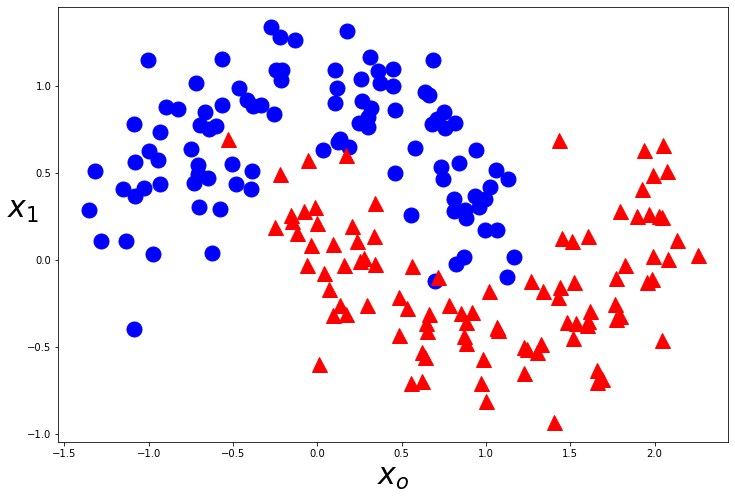

In [16]:
from matplotlib.colors import ListedColormap
def plot_decision_boundary(clf, x, y):
    _x1 = np.linspace(x[:, 0].min(), x[:, 0].max(), 100)
    _x2 = np.linspace(x[:, 1].min()-0.5, x[:, 1].max()+0.5, 100)
    x1, x2 = np.meshgrid(_x1, _x2)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(["mediumblue", "orangered"])
    plt.contourf(x1, x2, y_pred, alpha = 0.3, cmap=custom_cmap)
    
def plot_datasets(X, y):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bo", ms = 15)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "r^", ms = 15)
    plt.xlabel("$x_o$", fontsize = 30)
    plt.ylabel("$x_1$", fontsize = 30, rotation = 0)

plt.figure(figsize=(12, 8))
plot_datasets(x,y)
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [9]:
x_train,x_test, y_train, y_test = train_test_split(x, y, random_state=0)

tree_clf = DecisionTreeClassifier().fit(x_train, y_train)

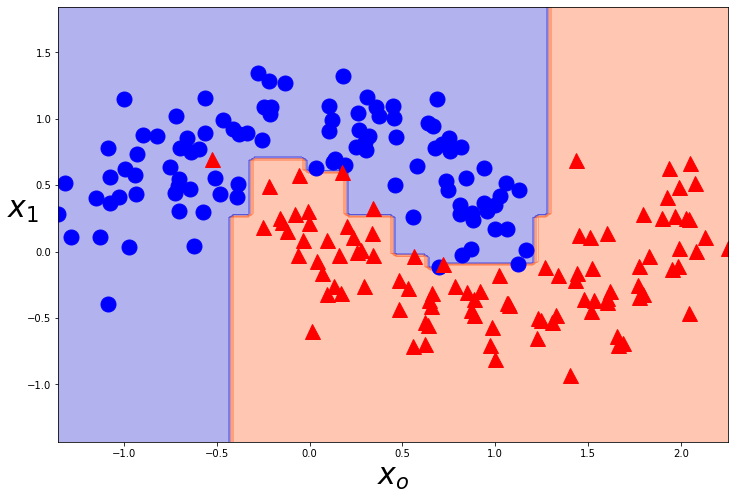

In [17]:
plt.figure(figsize=(12,8))
plot_decision_boundary(tree_clf, x, y)
plot_datasets(x,y)
plt.show()

In [19]:
from sklearn.ensemble import RandomForestClassifier

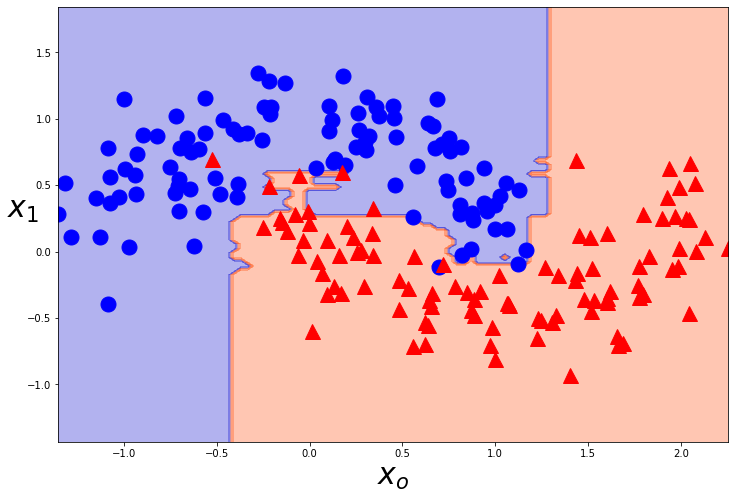

In [23]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=0).fit(x_train, y_train)
plt.figure(figsize=(12,8))
plot_decision_boundary(random_forest, x, y)
plot_datasets(x,y)
plt.show()

In [24]:
from sklearn.datasets import load_iris

In [26]:
iris = load_iris()
x_iris = iris.data
y_iris = iris.target

In [47]:
random_forest_iris = RandomForestClassifier(n_estimators =100 , random_state=1).fit(x_iris, y_iris)

In [48]:
random_forest_iris.feature_importances_

array([0.11427457, 0.02453657, 0.41131011, 0.44987874])

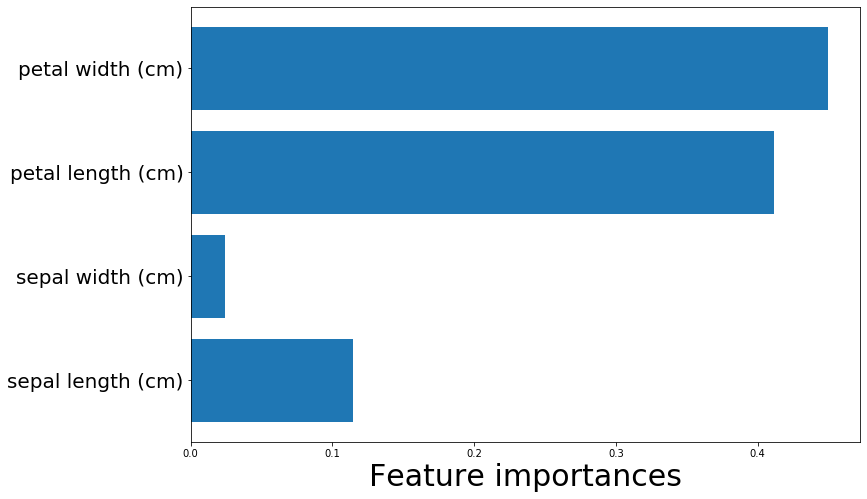

In [49]:
plt.figure(figsize=(12, 8))
plt.barh(range(iris.data.shape[1]), random_forest_iris.feature_importances_)
plt.yticks(range(iris.data.shape[1]), iris.feature_names, fontsize=20)
plt.xlabel("Feature importances", fontsize = 30)
plt.show()